# Body Parts


  ### 3.	Which parts of human body are more prone to be injured in such accidents

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
bodyParts = '''abdomen
Adam's apple
adenoids
adrenal gland
anatomy
ankle
anus
appendix
arch
arm
artery
back
ball of the foot
belly
belly button
big toe
bladder
blood
blood vessels
body
bone
brain
breast
buttocks
calf
capillary
carpal
cartilage
cell
cervical vertebrae
cheek
chest
chin
circulatory system
clavicle
coccyx
collar bone
diaphragm
digestive system
ear
ear lobe
elbow
E cont.
endocrine system
esophagus
eye
eyebrow
eyelashes
eyelid
face
fallopian tubes
feet
femur
fibula
filling
finger
fingernail
follicle
foot
forehead
gallbladder
glands
groin
gums
hair
hand
head
heart
heel
hip
humerus
immune system
instep
index finger
intestines
iris
jaw
kidney
knee
larynx
leg
ligament
lip
liver
lobe
lumbar vertebrae
lungs
lymph node
mandible
metacarpal
metatarsal
molar
mouth
muscle
nail
navel
neck
nerves
nipple
nose
nostril
organs
ovary
palm
pancreas
patella
pelvis
phalanges
pharynx
pinky
pituitary
pore
pupil
radius
rectum
red blood cells
respiratory system
ribs
sacrum
scalp
scapula
senses
shin
shoulder
shoulder blade
skeleton
skin
skull
sole
spinal column
spinal cord
spine
spleen
sternum
stomach
tarsal
teeth
tendon
testes
thigh
thorax
throat
thumb
thyroid
tibia
tissue
toe
toenail
tongue
tonsils
tooth
torso
trachea
ulna
ureter
urethra
urinary system
uterus
uvula
vein
vertebra
waist
white blood cells
wrist'''.split('\n')

In [3]:
baseDir = 'D:/KE/Text Mining/CA/'

# Assign spreadsheet filename to `file`
# Load spreadsheet
xl = pd.ExcelFile(baseDir+'MsiaAccidentCases.xlsx')

# Print the sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
miaCaseDf = xl.parse('MsiaAccidentCases-cleaned')
miaCaseDf.head()

['MsiaAccidentCases-cleaned', 'Sheet2', 'Sheet1']


,Cause,Title Case,Summary Case
0,Caught in/between Objects,Died being caught in between machines,The accident occurred as victim was assigned t...
1,Other,Died been buried,The accident occurred during the floor concret...
2,Struck By Moving Objects,Died crushed by entrance arch,Victim with four co-workers were installing wo...
3,Caught in/between Objects,Died due to mine cave-in,A series of avalanche trapped victim who was m...
4,Fires and Explosion,Died being run over by a lorry,Accident involving an employee who has been ru...


In [4]:
miaCaseDf.columns # .describe() #.groupby('Cause')  #.describe()

Index(['Cause ', 'Title Case', 'Summary Case'], dtype='object')

In [5]:
miaCaseDf.groupby('Cause ').describe()

Summary Case        \
                                        count  freq   
Cause                                                 
Caught in/between Objects                  46     1   
Collapse of object                          8     1   
Drowning                                    9     1   
Electrocution                              18     1   
Exposure to Chemical Substances             2     1   
Exposure to extreme temperatures            2     1   
Falls                                      73     1   
Fires and Explosion                         5     1   
Other                                      17     1   
Others                                      1     1   
Struck By Moving Objects                   51     1   
Suffocation                                 3     1   
TEST DATA                                   0  None   

                                                                                     \
                                                                                top   
Cause                                                                                 
Caught in/between Objects         The victim, 45 years, was killed after being p...   
Collapse of object                The victim, 37 years, a foreign national, was ...   
Drowning                          A child who was not being accompanied by his g...   
Electrocution                     Victim was electrocuted while doing service li...   
Exposure to Chemical Substances   Victim was found unconscious after got out of ...   
Exposure to extreme temperatures  The victim who was assigned to perform work of...   
Falls                             A pile of iron rod tube that has being lifted ...   
Fires and Explosion               Accident involving three workers were killed a...   
Other                             The trench wall collapsed and buried the victi...   
Others                                       A worker has been stung by wasps while   
Struck By Moving Objects          The victim died after being hit by a lorry tha...   
Suffocation                       2 victims died after inhaling toxic gas while ...   
TEST DATA                                                                      None   

                                        Title Case        \
                                 unique      count  freq   
Cause                                                      
Caught in/between Objects            46         46     2   
Collapse of object                    8          8     1   
Drowning                              9          9     6   
Electrocution                        18         18     4   
Exposure to Chemical Substances       2          2     1   
Exposure to extreme temperatures      2          2     1   
Falls                                73         73    35   
Fires and Explosion                   5          5     1   
Other                                17         17     2   
Others                                1          1     1   
Struck By Moving Objects             51         51     2   
Suffocation                           3          3     1   
TEST DATA                             0          0  None   

                                                                                  \
                                                                             top   
Cause                                                                              
Caught in/between Objects                                 Died crushed by object   
Collapse of object                               Died crushed by collapsing wall   
Drowning                                                    Died due to drowning   
Electrocution                                          Died due to electrocution   
Exposure to Chemical Substances   Died due to the exposure of hazardous chemical   
Exposure to extreme temperatures              Died due to contact with hot water   
Falls                                     

### Extract boby part information for each accident

In [6]:
# Assign spreadsheet filename to `file`
# Load spreadsheet
xl = pd.ExcelFile(baseDir+'osha.xlsx')

# Load a sheet into a DataFrame by name: df1
oshaDf = xl.parse('out_title', header=None, names = ['item','event',"details",'severity', "Hospitalization"])

In [7]:
oshaDf1 = oshaDf.iloc[:,1:]
oshaDf1.head()

,event,details,severity,Hospitalization
0,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,burn industrial truck waste proc fac pa...,
1,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,truck flatbed truck trailer fall abdomen,
2,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,construction undrgrd power line highway ...,1 317290559 Fatality Other Occupation not re...
3,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,waste proc fac industrial truck struck b...,
4,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,truck driver pump tank hot water struc...,


In [8]:

newstopwords=stopwords.words("English") + ['the','is','it','may'] 
    #+ ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}']
    
WNlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    tokens = word_tokenize(text)
    post = pos_tag(tokens, tagset='universal')
    #print(post)
    #post = [p for p in post if p not in newstopwords]
    
    newTxt = []
    for it in post:        
        if it[1] == 'NOUN':
            tmp = WNlemma.lemmatize(it[0], pos = 'n')
        elif it[1] == 'VERB':
            tmp = WNlemma.lemmatize(it[0], pos = 'v')
        elif it[1] == 'ADJ':
            tmp = it[0]
        else:
            #tmp = it[0]
            continue
        
        newTxt.append(tmp.lower())

    #tokens = [t.lower() for t in tokens if t not in newstopwords]
    
    #tokens=[WNlemma.lemmatize(t) for t in tokens]  # WNlemma.lemmatize('approves', pos='v')
    #tokens=[word for word in tokens if word not in newstopwords]

    return newTxt # [t.lower() for t in newTxt if t not in newstopwords]


In [9]:
oshaData = {}

#'item','event',"details",'severity', "Hospitalization"
for index, row in oshaDf1.iterrows():
    tmp = pre_process("{}. {}. {}. {}".format(row['event'], row['details'], row['severity'], row['Hospitalization'])) # 

    oshaData[index] = tmp

In [15]:

def determineBodyPart(text):
    tmp = []    
    for b in bodyParts:
        tmp += [t for t in text if t == b]
        
    return set(tmp)
    

In [16]:
columns = ['index','bodypart']
oshaBodyPart = {}

for index, text in oshaData.items():
    oshaBodyPart[index] = determineBodyPart(text)
    

In [17]:
oshaBodyParts = pd.DataFrame([(idx, ' '.join(tmp)) for (idx, tmp) in oshaBodyPart.items()], columns=['id', 'bodyparts'])
oshaBodyParts.head(10)

,id,bodyparts
0,0,foot abdomen back leg groin
1,1,abdomen
2,2,abdomen
3,3,torso abdomen face back blood head leg
4,4,leg abdomen shoulder
5,5,arm chest abdomen
6,6,abdomen
7,7,abdomen
8,8,abdomen
9,9,abdomen


In [25]:
combined = pd.read_csv('D:/workspace/textmining/MTech-KE-FL-TM/osha1.csv')

In [20]:

combined['bobypart'] = oshaBodyParts['bodyparts']

In [21]:
combined.head(10)

,Unnamed: 0,Case,Title,Description,Summary,Classification,Cause,Fatal,bobypart
0,0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,burn industrial truck waste proc fac pa...,,Struck By Moving Objects,False,foot abdomen back leg groin
1,1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,truck flatbed truck trailer fall abdomen,,Struck By Moving Objects,True,abdomen
2,2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,construction undrgrd power line highway ...,1 317290559 Fatality Other Occupation not re...,Struck By Moving Objects,True,abdomen
3,3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,waste proc fac industrial truck struck b...,,Caught in/between Objects,True,torso abdomen face back blood head leg
4,4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,truck driver pump tank hot water struc...,,Struck By Moving Objects,False,leg abdomen shoulder
5,5,202658258,Employee Suffers Burns While Moving Soup,On June 30 2013 Employee #1 was working in ...,burn spill arm chest abdomen,,Exposure to extreme temperatures,False,arm chest abdomen
6,6,202685947,Employee Injures Self With Knife,An incident occurred as Employee #1 was attem...,knife puncture abdomen struck by slip ...,,Struck By Moving Objects,False,abdomen
7,7,202673471,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 E...,construction equipment operator industri...,1 316211614 Fatality Fracture Supervisors m...,Caught in/between Objects,True,abdomen
8,8,202369575,Employee Fractures Abdomen When Run Over By T...,On April 23 2013 Employee #1 a baggage tug...,cart struck by run over fracture abdomen,,Struck By Moving Objects,False,abdomen
9,9,202509832,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing ...,installing ladder scaffold structure mo...,1 316817097 Hospitalized injury Fracture Car...,Falls,False,abdomen


### main body parts injured for each kind of accident

In [27]:
causes = np.unique(combined['Cause'])

In [23]:
def parseCause(cause):
    print('\nFor cause: ' + cause)
    tmpDf = combined.loc[combined['Cause'] == cause]

    bps = []
    for bp in tmpDf['bobypart']:
        if(bp == None or str(bp) == 'nan'):
            continue

        tmp = word_tokenize(bp)
        bps += tmp
    
    fd = nltk.FreqDist(bps)
    fd.most_common(25)
    fd.plot(25)
    
    wc = WordCloud(background_color="white").generate(' '.join(bps))

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


For cause: Caught in/between Objects


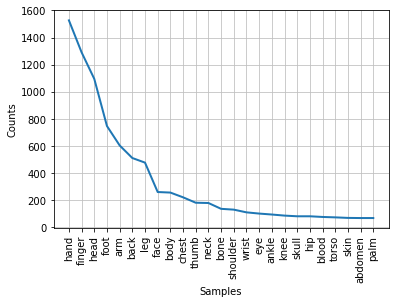

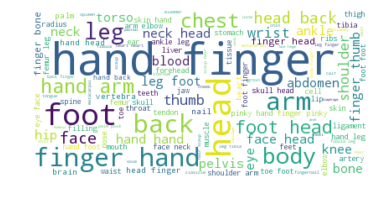


For cause: Collapse of object


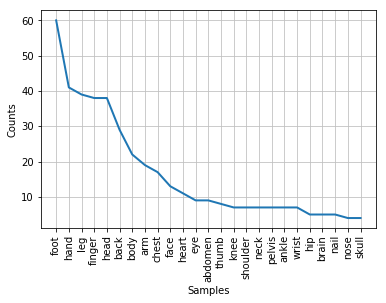

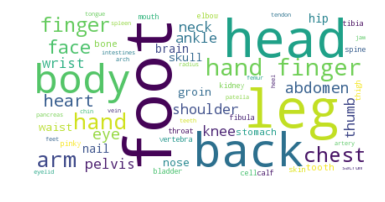


For cause: Drowning


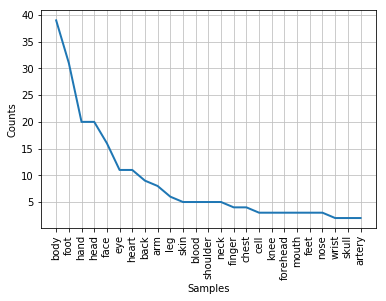

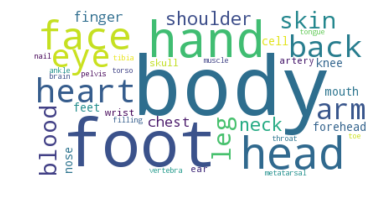


For cause: Electrocution


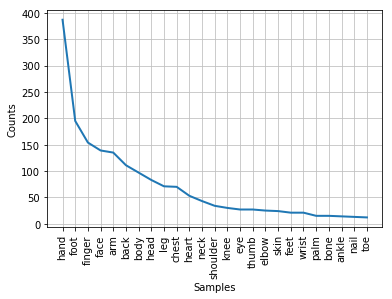

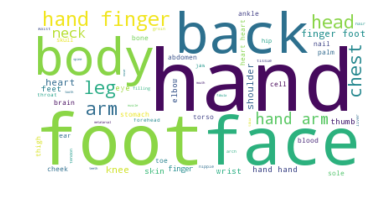


For cause: Exposure to Chemical Substances


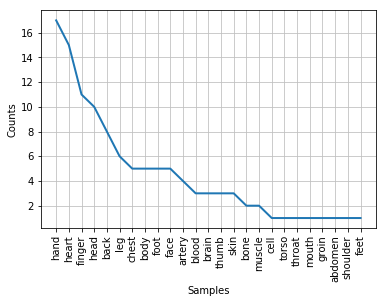

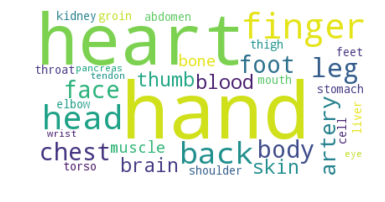


For cause: Exposure to extreme temperatures


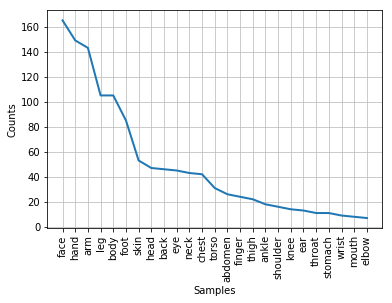

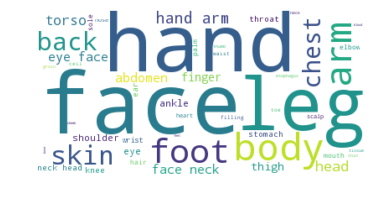


For cause: Falls


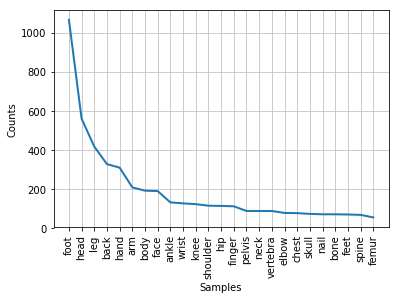

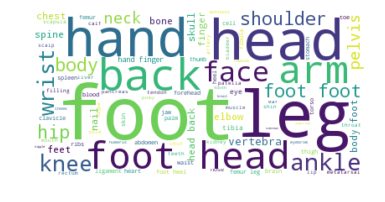


For cause: Fires and Explosion


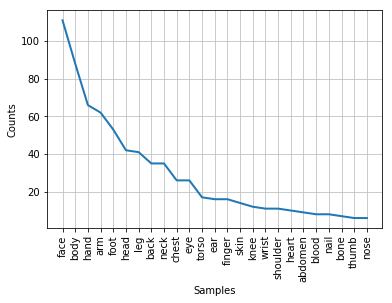

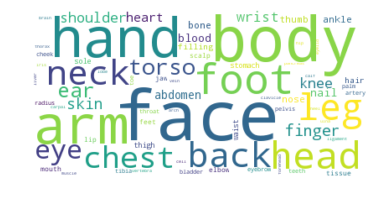


For cause: Other


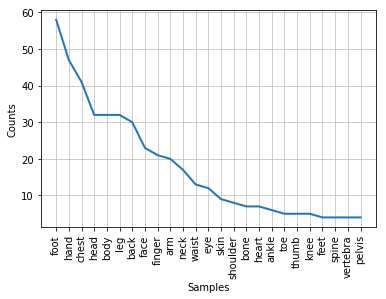

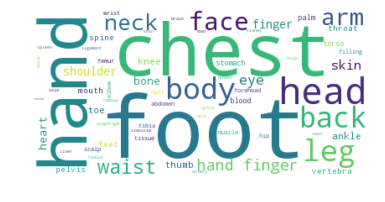


For cause: Struck By Moving Objects


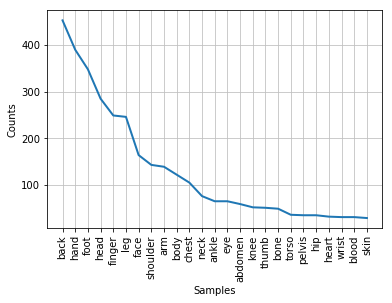

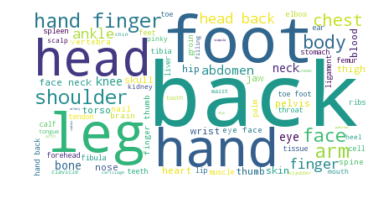


For cause: Suffocation


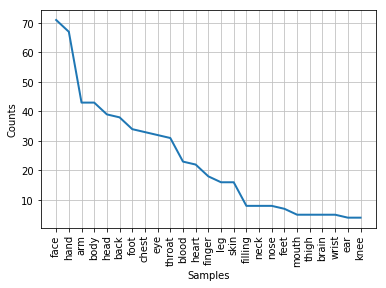

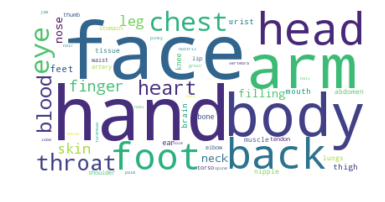

In [28]:
for cause in causes:
    parseCause(cause)

# Summary

 1. For body parts, we have the corpus. So it can be directly used here for information extraction.

 2. Some accidents do not have any body part inforamtion inside and they will be ignored for body parts analysis.
 
 3. "Hand" is the most prone to be injured during alomost all accident and should be taken care of. 